# **MNIST Digit recognition**

[Visit github page](https://github.com/imdarshik/CSCN8010-labs/tree/main/week7)

## **1. Introduction**


In this lab, we're focusing on understanding how well a model can recognize handwritten digits from the MNIST dataset. Our aim is to assess the model's performance and gain insights into its effectiveness. We'll start by obtaining the MNIST data, which consists of images of handwritten digits. Then, we'll explore the data to understand its characteristics. Following that, we'll choose the number of digit classes our model will recognize and split the data into training, validation, and test sets. After training our model, we'll evaluate its performance using various metrics like accuracy and confusion matrix. We'll also examine precision-recall curves to gain deeper insights. Finally, we'll test our model on unseen data and draw conclusions based on its performance. Let's dive in and explore the fascinating world of digit recognition!

#### **Dataset Overview**:

The MNIST database comprises handwritten digits, commonly used for testing classification algorithms. Here's a brief summary:

* Features: Each digit image has 784 features.
* Training Set: Includes the first 60,000 examples.
* Test Set: Consists of 10,000 examples for evaluation.

## **2. Data Exploration**

[Loading dataset and plotting reference](https://github.com/RanFeldesh/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb)

In [1]:
# Import the fetch_openml function from the sklearn.datasets module
from sklearn.datasets import fetch_openml

# Use the fetch_openml function to fetch the MNIST dataset
# Specify the dataset name 'mnist_784' to fetch the MNIST dataset with 784 features
# Set as_frame to False to return numpy arrays instead of pandas DataFrame
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

# Return the shapes of the feature data and target labels
mnist["data"].shape, mnist["target"].shape

((70000, 784), (70000,))

In [2]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defining a function to plot a single digit image
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

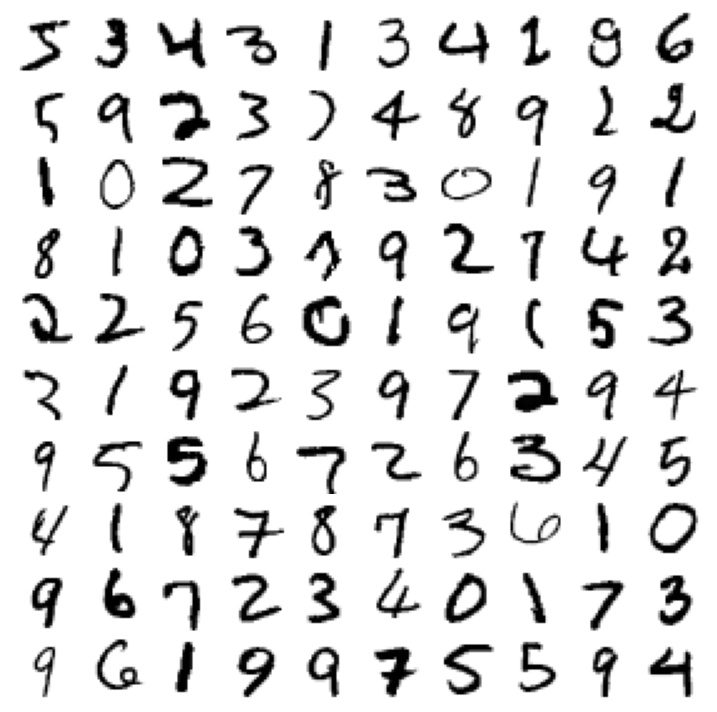

In [3]:
# Loop through a subset of digit images in the dataset and plot them
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(mnist["data"][:1000:10]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

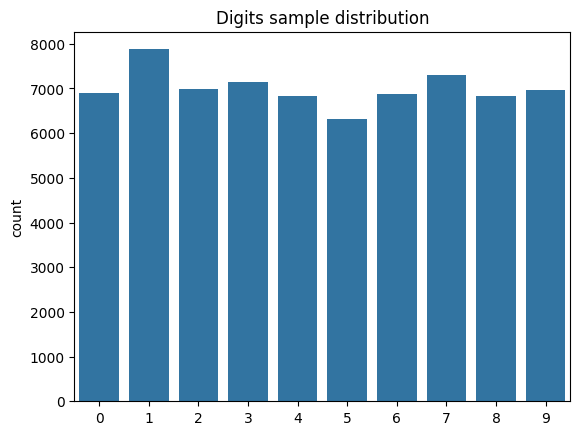

In [4]:
# Creating a count plot to visualize the distribution of digit samples
sns.countplot(x=np.sort(mnist["target"]))
plt.title("Digits sample distribution")
plt.show()

[Reference](https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm)

## **3. Data preprocessing**

In [5]:
# Selecting indices where the target values are either "1", "4", or "6"
indices = np.where(((mnist["target"] == "1") + (mnist["target"] == "4") + (mnist["target"] == "6")) == True)

# Extracting features (X) and target labels (y) based on selected indices
X = mnist["data"][indices]
y = mnist["target"][indices]

# Printing the shapes of the feature matrix (X) and the target array (y)
X.shape, y.shape

((21577, 784), (21577,))

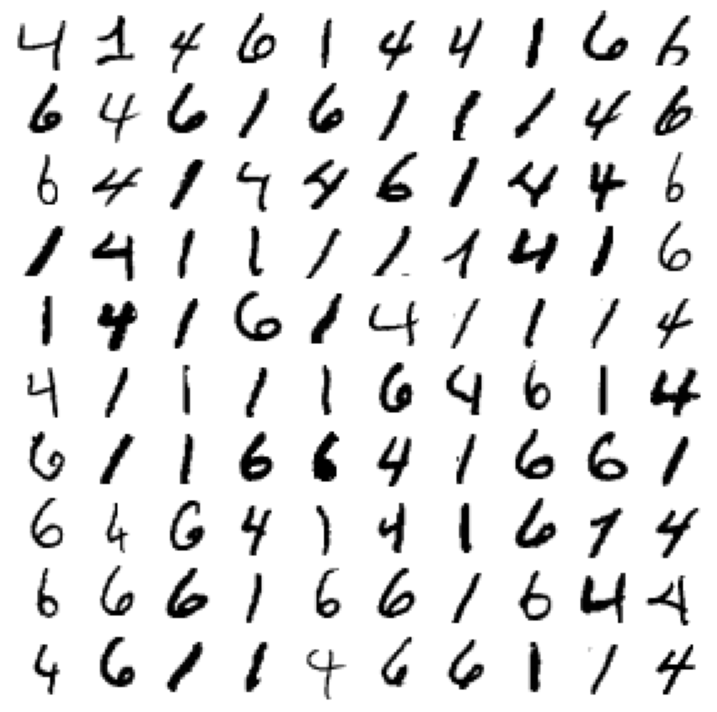

In [6]:
# Plotting sample Digits from Classes 1, 4, and 6
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:1000:10]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [7]:
# importing necessary libraries for train-test split
from sklearn.model_selection import train_test_split

X_scaled = X / 255.00

# Performing a two-way split for training (70%), validation (15%) and test (15%) sets using train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Display dimensions of the data sets
print("Train size  : ", X_train.shape)
print("Valid size  : ", X_val.shape)
print("Test size   : ", X_test.shape)

Train size  :  (15103, 784)
Valid size  :  (3237, 784)
Test size   :  (3237, 784)


## **4. Modeling**

In [8]:
# Importing necessary libraries for machine learning algorithms
from sklearn.svm import SVC  # Importing Support Vector Classifier (SVC) from scikit-learn
from sklearn import metrics  # Importing metrics module from scikit-learn for model evaluation
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression classifier from scikit-learn
from sklearn.neural_network import MLPClassifier  # Importing Multi-layer Perceptron (MLP) classifier from scikit-learn

In [13]:
# Creating an instance of Logistic Regression classifier
# Reference: https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/
model_log = LogisticRegression(fit_intercept=True,  
                         multi_class='auto',  
                         penalty='l2', 
                         solver='saga',  
                         max_iter=10000, 
                         C=50)  
# Fitting the model to the training data
model_log.fit(X_train, y_train)
# Making predictions on the validation data
y_pred = model_log.predict(X_val)

In [14]:
# Calculating accuracy
accuracy = metrics.accuracy_score(y_val, y_pred)
# Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
# Calculating precision, recall, and F1 score for each class
precision = metrics.precision_score(y_val, y_pred, average=None)
recall = metrics.recall_score(y_val, y_pred, average=None)
f1 = metrics.f1_score(y_val, y_pred, average=None)

# Printing the scores
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9873339511893728
Confusion Matrix:
 [[1171    3    7]
 [   6 1008   10]
 [   4   11 1017]]
Precision: [0.9915326  0.98630137 0.98355899]
Recall: [0.9915326  0.984375   0.98546512]
F1 Score: [0.9915326  0.98533724 0.98451113]


In [9]:
# Creating an instance of Support Vector Classifier (SVC) with a linear kernel
# Reference: https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm
model_svc = SVC(kernel='linear')
# Fitting the model to the training data
model_svc.fit(X_train, y_train)
# Making predictions on the validation data
y_pred = model_svc.predict(X_val)

In [10]:
# Calculating accuracy
accuracy = metrics.accuracy_score(y_val, y_pred)
# Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
# Calculating precision, recall, and F1 score for each class
precision = metrics.precision_score(y_val, y_pred, average=None)
recall = metrics.recall_score(y_val, y_pred, average=None)
f1 = metrics.f1_score(y_val, y_pred, average=None)

# Printing the scores
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9919678714859438
Confusion Matrix:
 [[1179    2    0]
 [   5 1014    5]
 [   3   11 1018]]
Precision: [0.99326032 0.98734177 0.99511241]
Recall: [0.99830652 0.99023438 0.98643411]
F1 Score: [0.99577703 0.98878596 0.99075426]


In [11]:
# Creating an instance of Support Vector Classifier (SVC) with a rbf kernel
# Reference: https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm
model_svc = SVC(kernel='rbf')
# Fitting the model to the training data
model_svc.fit(X_train, y_train)
# Making predictions on the validation data
y_pred = model_svc.predict(X_val)

In [12]:
# Calculating accuracy
accuracy = metrics.accuracy_score(y_val, y_pred)
# Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
# Calculating precision, recall, and F1 score for each class
precision = metrics.precision_score(y_val, y_pred, average=None)
recall = metrics.recall_score(y_val, y_pred, average=None)
f1 = metrics.f1_score(y_val, y_pred, average=None)

# Printing the scores
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9962928637627433
Confusion Matrix:
 [[1177    2    2]
 [   1 1020    3]
 [   2    2 1028]]
Precision: [0.99745763 0.99609375 0.99515973]
Recall: [0.99661304 0.99609375 0.99612403]
F1 Score: [0.99703515 0.99609375 0.99564165]


Insights from the SVM model with an RBF kernel for classes 1, 4, and 6:

**High Accuracy**: The model achieves an accuracy of approximately 99.63%, indicating strong overall performance in digit classification.

**Confusion Matrix**:

- Few misclassifications are observed, primarily between classes 1 and 4.
- Class 6 is relatively well distinguished from the other classes.

**Precision, Recall, and F1 Score**:

- High precision (>99.5%) indicates low false positive rates.
- High recall (>99.5%) demonstrates effective capture of true positive instances.
- F1 scores (>99.5%) indicate balanced performance in terms of precision and recall for all classes.

In summary, the SVM model exhibits robust performance in classifying digits 1, 4, and 6, with minimal misclassifications and high precision, recall, and F1 scores.

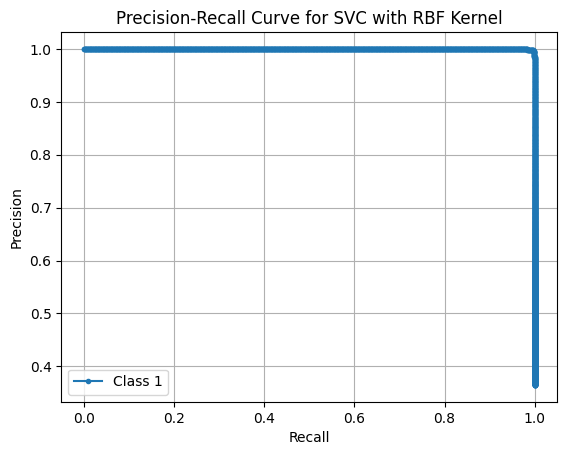

In [25]:
# Making predictions on the validation data
y_scores = model_svc.decision_function(X_val)

# Calculating precision and recall for each class
# Calculating precision and recall for each class
precision = dict()
recall = dict()
classes = ["1", "4", "6"]
for i in range(len(classes)):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_val == classes[i], y_scores[:, i])

# Plotting precision-recall curve for class 1
plt.figure()
plt.plot(recall[0], precision[0], marker='.', label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVC with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

[Reference](https://www.datacamp.com/tutorial/precision-recall-curve-tutorial)

The precision-recall plot for class 1 shows a nearly perfect scenario, with both precision and recall values close to 1. This is evident from the graph line, which sharply bends at a 90-degree angle, indicating high precision and recall values. This indicates the model's ability to accurately identify items in a specific group. The model excels at finding the right digit "1"s with with minimal errors, as shown by the sharp turn in the plot.

## **5. Evaluations**

In [26]:
# Making predictions on the test data
y_pred = model_svc.predict(X_test)

# Calculating accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
# Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
# Calculating precision, recall, and F1 score for each class
precision = metrics.precision_score(y_test, y_pred, average=None)
recall = metrics.recall_score(y_test, y_pred, average=None)
f1 = metrics.f1_score(y_test, y_pred, average=None)

# Printing the scores
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9966017917825146
Confusion Matrix:
 [[1179    2    1]
 [   2 1018    4]
 [   2    0 1029]]
Precision: [0.99661877 0.99803922 0.99516441]
Recall: [0.99746193 0.99414062 0.99806014]
F1 Score: [0.99704017 0.99608611 0.99661017]


## **6. Conclusion**

Based on the test results:

- The model shows very high accuracy at approximately 99.66%.
- It effectively predicts all classes with minimal errors.
- Precision, recall, and F1 scores are all very high, indicating strong performance overall.

In summary, the model performs exceptionally well in classifying digits 1, 4, and 6 accurately

In [32]:
# !jupyter nbconvert --to html Practical_lab7.ipynb